In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import ticker
import h5py

In [3]:
zundel_stw_e = np.loadtxt("/Users/aodongliu/LiGroup/gaussian/DIIS_benchmark/4H2O+/zundel/zundel_stw_e.dat", dtype=None)
zundel_stw_pe = np.loadtxt("/Users/aodongliu/LiGroup/gaussian/DIIS_benchmark/4H2O+/zundel/zundel_stw_pe.dat", dtype=None)
zundel_stw_pp = np.loadtxt("/Users/aodongliu/LiGroup/gaussian/DIIS_benchmark/4H2O+/zundel/zundel_stw_pp.dat", dtype=None)

zundel_smtd_e = np.loadtxt("/Users/aodongliu/LiGroup/gaussian/DIIS_benchmark/4H2O+/zundel/zundel_smtd_e.dat", dtype=None)
zundel_smtd_pe = np.loadtxt("/Users/aodongliu/LiGroup/gaussian/DIIS_benchmark/4H2O+/zundel/zundel_smtd_pe.dat", dtype=None)
zundel_smtd_pp = np.loadtxt("/Users/aodongliu/LiGroup/gaussian/DIIS_benchmark/4H2O+/zundel/zundel_smtd_pp.dat", dtype=None)

In [4]:
zundel_stw_iter = np.arange(1,zundel_stw_e.size,1)
zundel_stw_iter2 = np.arange(1,zundel_stw_pe.size,1)
zundel_smtd_iter = np.arange(1,zundel_smtd_e.size,1)

In [5]:
# Subtract the final energy for energy at each iteration
zundel_stw_e -= zundel_stw_e[-1]
zundel_smtd_e -= zundel_smtd_e[-1]


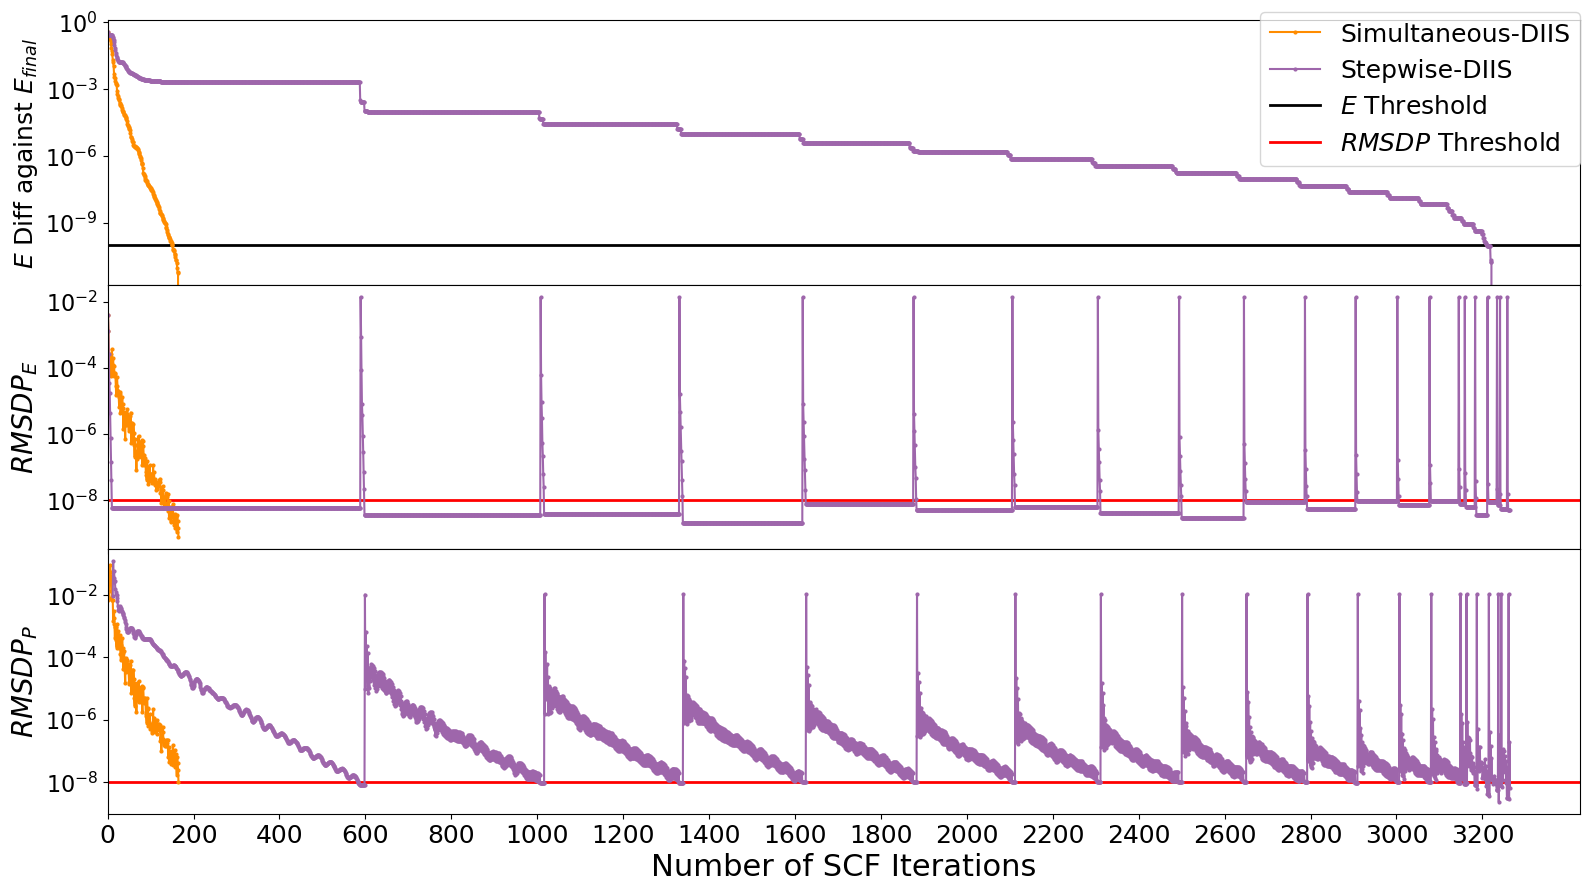

In [37]:
plt.style.use('default')
fig = plt.figure(figsize=(16,9))
gs = fig.add_gridspec(3, hspace=0)
ax = gs.subplots(sharex=True)
#fig.suptitle('NEO-SCF with Different Algorithms, hatz/pb4d, $4H_2O+$ zundel Isomer')
ax[0].plot(zundel_smtd_iter,zundel_smtd_e[1:],'o-',c='darkorange',ms=2,label="Simultaneous-DIIS")
ax[0].plot(zundel_stw_iter,zundel_stw_e[1:],'o-',c='#9e66ab',ms=2,label="Stepwise-DIIS")
ax[0].axhline(y=10**(-10),xmin=0,xmax=zundel_stw_iter.size+1,c="black",linewidth=2,zorder=0,label='$E$ Threshold')
ax[0].set_yscale("log")
ax[0].set_ylabel("$E$ Diff against $E_{final}$",fontsize=18)
#ax[0].set_yticks([10**(-10),0])
#ax[0].legend(loc='upper right')


ax[1].plot(zundel_smtd_iter,zundel_smtd_pe[1:],'o-',c='darkorange',ms=2)
ax[1].plot(zundel_stw_iter2,zundel_stw_pe[1:],'o-',c='#9e66ab',ms=2)
ax[1].axhline(y=10**(-8),xmin=0,xmax=zundel_stw_iter.size+1,c="red",linewidth=2,zorder=0,label='$RMSDP$ Threshold')
ax[1].set_yscale("log")
ax[1].set_ylabel("$RMSD P_E$",fontsize=20,fontweight='bold')
#ax[1].legend(loc='upper right')


ax[2].plot(zundel_smtd_iter,zundel_smtd_pp[1:],'o-',c='darkorange',ms=2)
ax[2].plot(zundel_stw_iter2[11:],zundel_stw_pp[12:],'o-',c='#9e66ab',ms=2)
ax[2].axhline(y=10**(-8),xmin=0,xmax=zundel_stw_iter.size+1,c="red",linewidth=2,zorder=0)
ax[2].set_yscale("log")
ax[2].set_ylabel("$RMSD P_P$",fontsize=20)
#ax[2].legend(loc='upper right')
ax[2].set_xlabel("Number of SCF Iterations", fontsize=22)
ax[2].set_xticks(np.arange(0, zundel_stw_iter.size+1, step=200))
ax[2].set_xticklabels(ax[2].get_xticks(), rotation=0, size=18)
ax[2].set_xlim(xmin=0)

ax[0].tick_params(axis='y', labelsize=16)
ax[1].tick_params(axis='y', labelsize=16)
ax[2].tick_params(axis='y', labelsize=16)
# # Hide x labels and tick labels for all but bottom plot.
# for axes in ax:
#    axes.label_outer()

fig.set_facecolor('w')
lines_labels = [axes.get_legend_handles_labels() for axes in ax]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels,fontsize=18)

plt.tight_layout()
plt.savefig('/Users/aodongliu/LiGroup/gaussian/zundel_2AlgCompvsE.pdf', dpi=2400)
plt.show()


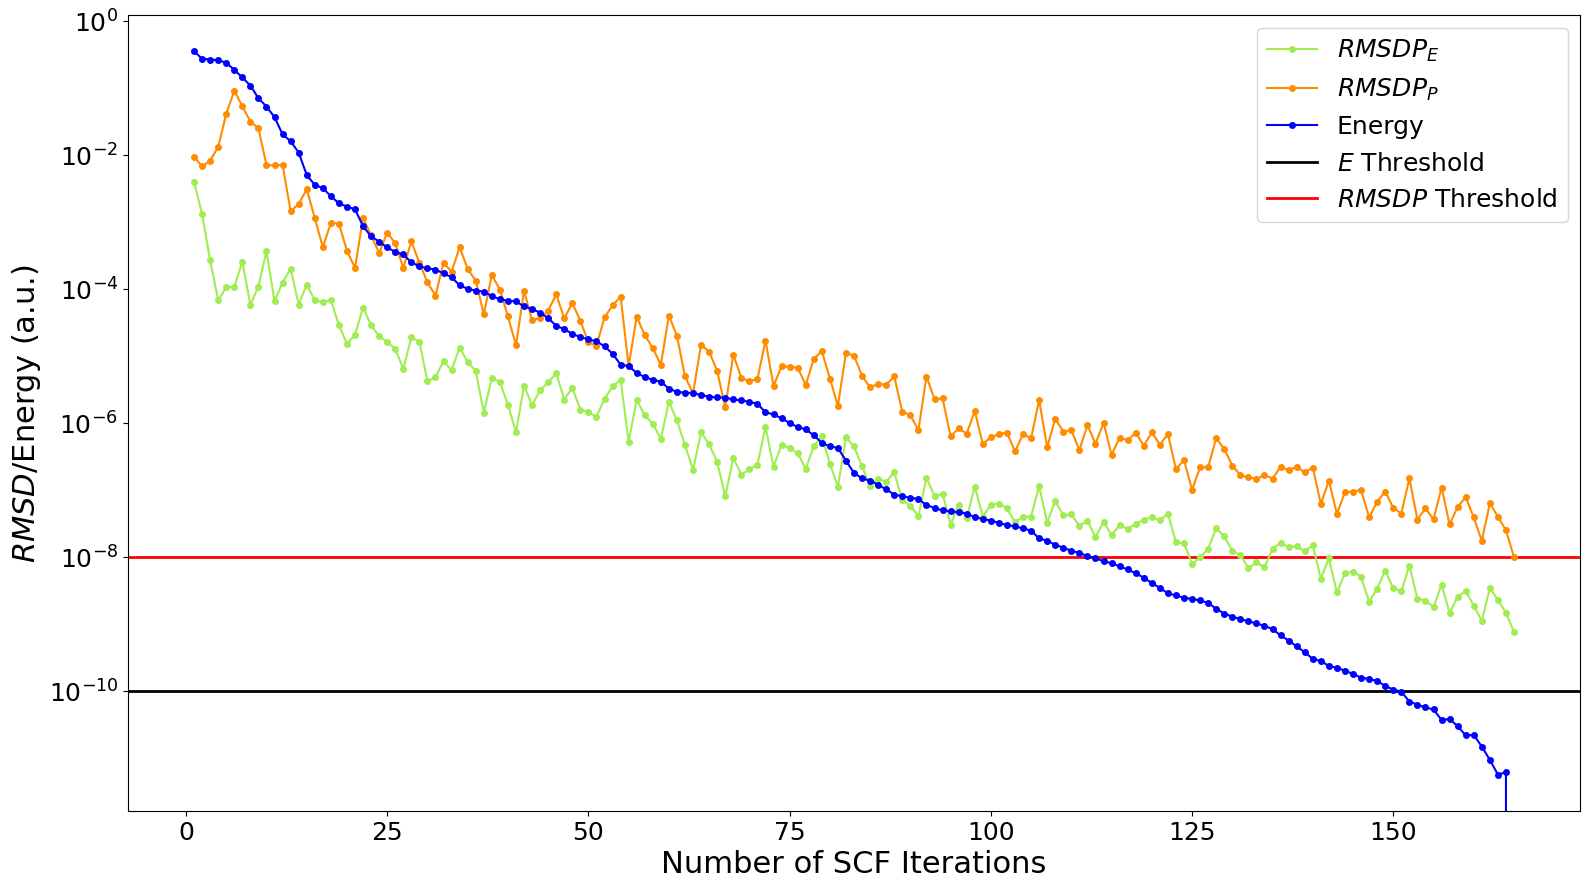

In [38]:
#plt.style.use('classic')
plt.style.use('default')
plt.rcParams["figure.figsize"] = (16,9)
plt.plot(zundel_smtd_iter,zundel_smtd_pe[1:],'o-',color='#A0ED52',ms=4,label="$RMSD P_E$")
plt.plot(zundel_smtd_iter,zundel_smtd_pp[1:],'o-',color='darkorange',ms=4,label="$RMSD P_P$")
plt.plot(zundel_smtd_iter,zundel_smtd_e[1:],'o-',c='blue',ms=4,label="Energy")
plt.axhline(y=10**(-10),xmin=0,xmax=zundel_smtd_iter.size+1,c="black",linewidth=2,zorder=0,label='$E$ Threshold')
plt.axhline(y=10**(-8),xmin=0,xmax=zundel_smtd_iter.size+1,c="red",linewidth=2,zorder=0,label='$RMSDP$ Threshold')
plt.yscale('log')
plt.legend(fontsize=18)
plt.ylabel("$RMSD$/Energy (a.u.)",fontsize=22)
plt.xlabel("Number of SCF Iterations",fontsize=22)
plt.xticks(size=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.savefig('/Users/aodongliu/LiGroup/gaussian/zundel_zoomin.pdf', dpi=2400)
plt.show()